In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns
%matplotlib inline

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bixuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bixuan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('C:/Users/Bixuan/Downloads/data30Mar.csv')


In [4]:
df.head()

,Unnamed: 0,DOI,cleanTitle,container-title,cleanAbstract,is-referenced-by-count
0,0,10.5130/ajceb.v14i3.4154,investigating factors associated job satisfact...,Construction Economics and Building,purpose paper twofold firstly aim ascertain ma...,0
1,1,10.5130/ajceb.v14i3.4156,entry location entry timing elet decision mode...,Construction Economics and Building,paper proposes model entry location el entry t...,3
2,2,10.5130/ajceb.v14i3.4155,prioritising project scope definition elements...,Construction Economics and Building,complete definition scope project upfront earl...,4
3,3,10.5130/ajceb.v14i3.4157,examination structure sustainable facilities p...,Construction Economics and Building,universities increasing pressure demonstrate c...,1
4,4,10.5130/ajceb.v14i3.4151,policies avoid cost overruns infrastructure pr...,Construction Economics and Building,many infrastructure projects cost overruns lot...,1


In [5]:
newdf = pd.DataFrame()

In [6]:
def cleandata(x):
    x = str(x).strip()
    x = x.replace('<jats:p>', '')
    x = x.replace('</jats:p>', '')
    text = x.split(' ')
    text = ' '.join([i for i in text if not i.isdigit()])
    text = re.sub("[!@#$+%*:()'-]", ' ', text)
    
    #remove numbers and convert into lowercase
    text = re.sub(r'\d+', '', text).lower()
    
    #remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    text = ' '.join([i for i in tokens if not i in stop_words])
    
    return text
    
#     stemmer= PorterStemmer()
#     words = text.split(' ')
#     alltext = []
#     for word in words:
#         alltext.append(stemmer.stem(word))
#     return ' '.join(alltext)


# def removeNumbers(x):
#     return re.sub(r'\d+', '', x)
    
# def tolowercase(x):
#     return x.lower()

def removePunctuation(x):
    translator = str.maketrans('', '', string.punctuation)
    return x.translate(translator)

##Convert container title from list to string
def listToItem(lst):
    if type(lst) == list:
        if len(lst) != 0:
            return lst[0]

#remove stop words
# def removeStopWords(x):
#     stop_words = set(stopwords.words('english'))
#     tokens = word_tokenize(x)
#     result = ' '.join([i for i in tokens if not i in stop_words])
#     return result

#stemming words
# def stemmmingWords(x):
#     stemmer= PorterStemmer()
#     words = x.split(' ')
#     text = []
#     for word in words:
#         text.append(stemmer.stem(word))
#     return ' '.join(text)

In [7]:
allJournals = []
for i in df['container-title']:
    name = removePunctuation(i)
    if not name in allJournals:
        allJournals.append(name)
allJournals

['Construction Economics and Building',
 'Chemical Communications',
 'Chem Commun',
 'Dalton Transactions',
 'Dalton Trans',
 'Journal of Civil Engineering and Management',
 'JOURNAL OF CIVIL ENGINEERING AND MANAGEMENT',
 'Advanced Materials Research',
 'RSC Advances',
 'RSC Adv',
 'Applied Mechanics and Materials',
 'Nationalities Papers',
 'Journal of Materials Chemistry A',
 'J Mater Chem A',
 'Natural Hazards and Earth System Sciences',
 'Natural Hazards and Earth System Science',
 'Journal of Disaster Research']

In [8]:
newdf['DOI']= df.DOI
newdf['abstract'] = df.cleanAbstract
newdf['title'] = df.cleanTitle
newdf['journal'] = df['container-title']


In [9]:
newdf.head()

,DOI,abstract,title,journal
0,10.5130/ajceb.v14i3.4154,purpose paper twofold firstly aim ascertain ma...,investigating factors associated job satisfact...,Construction Economics and Building
1,10.5130/ajceb.v14i3.4156,paper proposes model entry location el entry t...,entry location entry timing elet decision mode...,Construction Economics and Building
2,10.5130/ajceb.v14i3.4155,complete definition scope project upfront earl...,prioritising project scope definition elements...,Construction Economics and Building
3,10.5130/ajceb.v14i3.4157,universities increasing pressure demonstrate c...,examination structure sustainable facilities p...,Construction Economics and Building
4,10.5130/ajceb.v14i3.4151,many infrastructure projects cost overruns lot...,policies avoid cost overruns infrastructure pr...,Construction Economics and Building


In [10]:
newdf['cleanTitle'] = newdf.title.apply(lambda x : cleandata(x))
# newdf['cleanTitle'] = newdf.cleanTitle.apply(lambda x : tolowercase(x))
# newdf['cleanTitle'] = newdf.cleanTitle.apply(lambda x : removeNumbers(x))
# newdf['cleanTitle'] = newdf.cleanTitle.apply(lambda x : removePunctuation(x))
# newdf['cleanTitle'] = newdf.cleanTitle.apply(lambda x : removeStopWords(x))
# newdf['cleanTitle'] = newdf.cleanTitle.apply(lambda x : stemmmingWords(x))


newdf

,DOI,abstract,title,journal,cleanTitle
0,10.5130/ajceb.v14i3.4154,purpose paper twofold firstly aim ascertain ma...,investigating factors associated job satisfact...,Construction Economics and Building,investigating factors associated job satisfact...
1,10.5130/ajceb.v14i3.4156,paper proposes model entry location el entry t...,entry location entry timing elet decision mode...,Construction Economics and Building,entry location entry timing elet decision mode...
2,10.5130/ajceb.v14i3.4155,complete definition scope project upfront earl...,prioritising project scope definition elements...,Construction Economics and Building,prioritising project scope definition elements...
3,10.5130/ajceb.v14i3.4157,universities increasing pressure demonstrate c...,examination structure sustainable facilities p...,Construction Economics and Building,examination structure sustainable facilities p...
4,10.5130/ajceb.v14i3.4151,many infrastructure projects cost overruns lot...,policies avoid cost overruns infrastructure pr...,Construction Economics and Building,policies avoid cost overruns infrastructure pr...
5,10.5130/ajceb.v14i3.4152,quality learning students experience heavily d...,stimulating learning integrated assessments co...,Construction Economics and Building,stimulating learning integrated assessments co...
6,10.5130/ajceb.v14i2.3925,problems concerning quality productivity const...,problems problem attention construction sector...,Construction Economics and Building,problems problem attention construction sector...
7,10.5130/ajceb.v14i2.3778,lack clarity contract documents lead disputes ...,modifications standard forms contract impact r...,Construction Economics and Building,modifications standard forms contract impact r...
8,10.5130/ajceb.v14i2.3759,linkages among different construction markets ...,spatial linkages among australian construction...,Construction Economics and Building,spatial linkages among australian construction...
9,10.5130/ajceb.v14i2.3839,building act commenced western australia april...,effect building act compliance costs western a...,Construction Economics and Building,effect building act compliance costs western a...


In [11]:
newdf['cleanAbstract'] = newdf.abstract.apply(lambda x : cleandata(x))
#newdf['cleanAbstract'] = newdf.cleanAbstract.apply(lambda x : tolowercase(x))
#newdf['cleanAbstract'] = newdf.cleanAbstract.apply(lambda x : removeNumbers(x))
#newdf['cleanAbstract'] = newdf.cleanAbstract.apply(lambda x : removePunctuation(x))
#newdf['cleanAbstract'] = newdf.cleanAbstract.apply(lambda x : removeStopWords(x))
#newdf['cleanAbstract'] = newdf.cleanAbstract.apply(lambda x : stemmmingWords(x))


newdf

,DOI,abstract,title,journal,cleanTitle,cleanAbstract
0,10.5130/ajceb.v14i3.4154,purpose paper twofold firstly aim ascertain ma...,investigating factors associated job satisfact...,Construction Economics and Building,investigating factors associated job satisfact...,purpose paper twofold firstly aim ascertain ma...
1,10.5130/ajceb.v14i3.4156,paper proposes model entry location el entry t...,entry location entry timing elet decision mode...,Construction Economics and Building,entry location entry timing elet decision mode...,paper proposes model entry location el entry t...
2,10.5130/ajceb.v14i3.4155,complete definition scope project upfront earl...,prioritising project scope definition elements...,Construction Economics and Building,prioritising project scope definition elements...,complete definition scope project upfront earl...
3,10.5130/ajceb.v14i3.4157,universities increasing pressure demonstrate c...,examination structure sustainable facilities p...,Construction Economics and Building,examination structure sustainable facilities p...,universities increasing pressure demonstrate c...
4,10.5130/ajceb.v14i3.4151,many infrastructure projects cost overruns lot...,policies avoid cost overruns infrastructure pr...,Construction Economics and Building,policies avoid cost overruns infrastructure pr...,many infrastructure projects cost overruns lot...
5,10.5130/ajceb.v14i3.4152,quality learning students experience heavily d...,stimulating learning integrated assessments co...,Construction Economics and Building,stimulating learning integrated assessments co...,quality learning students experience heavily d...
6,10.5130/ajceb.v14i2.3925,problems concerning quality productivity const...,problems problem attention construction sector...,Construction Economics and Building,problems problem attention construction sector...,problems concerning quality productivity const...
7,10.5130/ajceb.v14i2.3778,lack clarity contract documents lead disputes ...,modifications standard forms contract impact r...,Construction Economics and Building,modifications standard forms contract impact r...,lack clarity contract documents lead disputes ...
8,10.5130/ajceb.v14i2.3759,linkages among different construction markets ...,spatial linkages among australian construction...,Construction Economics and Building,spatial linkages among australian construction...,linkages among different construction markets ...
9,10.5130/ajceb.v14i2.3839,building act commenced western australia april...,effect building act compliance costs western a...,Construction Economics and Building,effect building act compliance costs western a...,building act commenced western australia april...


In [12]:
newdf.journal.replace(['Chem. Commun.', 'RSC Adv.','Natural Hazards and Earth System Sciences','J. Mater. Chem. A','Dalton Trans.','JOURNAL OF CIVIL ENGINEERING AND MANAGEMENT'], 
                      ['Chemical Communications', 'RSC Advances','Natural Hazards and Earth System Science','Journal of Materials Chemistry A','Dalton Transactions','Journal of Civil Engineering and Management'], inplace=True)

## Distribution across different journals

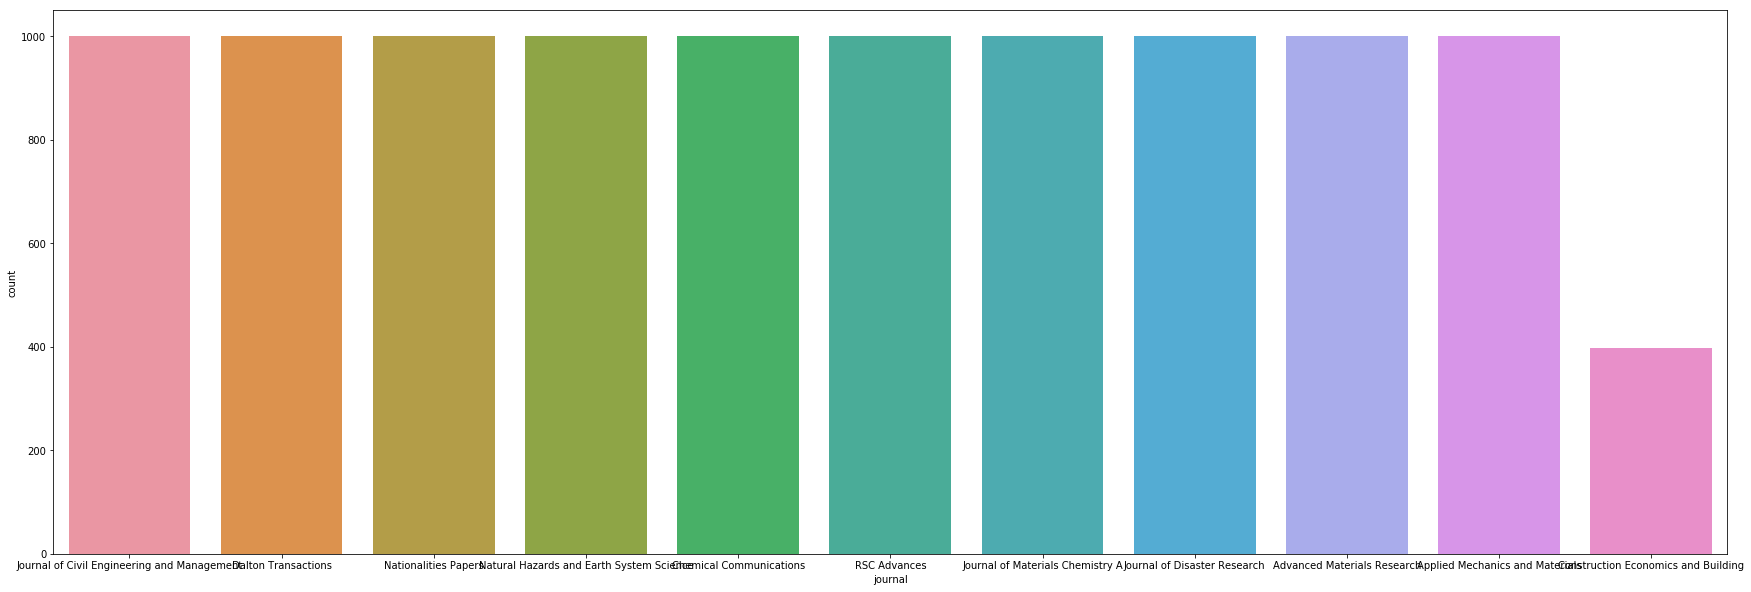

In [13]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'journal', data = newdf, order = newdf['journal'].value_counts().index)


## Word cloud 

In [14]:
from nltk import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [15]:
def preprocessing(titles_array):
    
    processed_array = []
    
    for title in titles_array:
        
        # remove digits and other non-alphabets symbols with space (i.e. keep only alphabets and whitespaces)
        processed_title = re.sub('[^a-zA-Z ]', '', title.lower())
        words = processed_title.split()
        
        # remove words that have length of 1
        processed_array.append([word for word in words if len(word) > 1])
    
    return processed_array

In [16]:
def get_freqdist_wc(titles, journal, num_words=20):
    
    freq_dist = FreqDist([word for title in titles for word in title])
    wordcloud = WordCloud(background_color='White').generate_from_frequencies(freq_dist)
    
    plt.figure(figsize=(22,6))
    plt.subplot2grid((1,5),(0,0),colspan=2)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')

    plt.subplot2grid((1,5),(0,2),colspan=3)
    plt.title(f'Frequency Distribution ({journal}, Top {num_words})', fontsize=20)
    freq_dist.plot(num_words, marker='|', markersize=20)

    plt.tight_layout()
    plt.show()

In [38]:
#Construction_Economics_and_Building = newdf.loc[newdf['journal'] == "Construction Economics and Building",'cleanAbstract']
#get_freqdist_wc(Construction_Economics_and_Building, 'Construction Economics and Building')

Construction_Economics_and_Building = newdf.loc[newdf['journal'] == 'Construction Economics and Building','cleanTitle'].values
Journal_of_Disaster_Research = newdf.loc[newdf['journal'] == 'Journal of Disaster Research','cleanTitle'].values
RSC_Advances = newdf.loc[newdf['journal'] == 'RSC Advances','cleanTitle'].values
Applied_Mechanics_and_Materials = newdf.loc[newdf['journal'] == 'Applied Mechanics and Materials','cleanTitle'].values
Journal_of_Civil_Engineering_and_Management = newdf.loc[newdf['journal'] == 'Journal of Civil Engineering and Management','cleanTitle'].values
Chemical_Communications = newdf.loc[newdf['journal'] == 'Chemical Communications','cleanTitle'].values
Dalton_Transactions = newdf.loc[newdf['journal'] == 'Dalton Transactions','cleanTitle'].values
Advanced_Materials_Research = newdf.loc[newdf['journal'] == 'Advanced Materials Research','cleanTitle'].values
Nationalities_Papers = newdf.loc[newdf['journal'] == 'Nationalities Papers','cleanTitle'].values
Journal_of_Materials_Chemistry_A = newdf.loc[newdf['journal'] == 'Journal of Materials Chemistry A','cleanTitle'].values
Natural_Hazards_and_Earth_System_Science = newdf.loc[newdf['journal'] == 'Natural Hazards and Earth System Science','cleanTitle'].values

In [39]:
Construction_Economics_and_Building_p = preprocessing(Construction_Economics_and_Building)
Journal_of_Disaster_Research_p = preprocessing(Journal_of_Disaster_Research)
RSC_Advances_p = preprocessing(RSC_Advances)
Applied_Mechanics_and_Materials_p = preprocessing(Applied_Mechanics_and_Materials)
Journal_of_Civil_Engineering_and_Management_p = preprocessing(Journal_of_Civil_Engineering_and_Management)
Chemical_Communications_p = preprocessing(Chemical_Communications)
Dalton_Transactions_p = preprocessing(Dalton_Transactions)
Advanced_Materials_Research_p = preprocessing(Advanced_Materials_Research)
Nationalities_Papers_p = preprocessing(Nationalities_Papers)
Journal_of_Materials_Chemistry_A_p = preprocessing(Journal_of_Materials_Chemistry_A)
Natural_Hazards_and_Earth_System_Science_p = preprocessing(Natural_Hazards_and_Earth_System_Science)

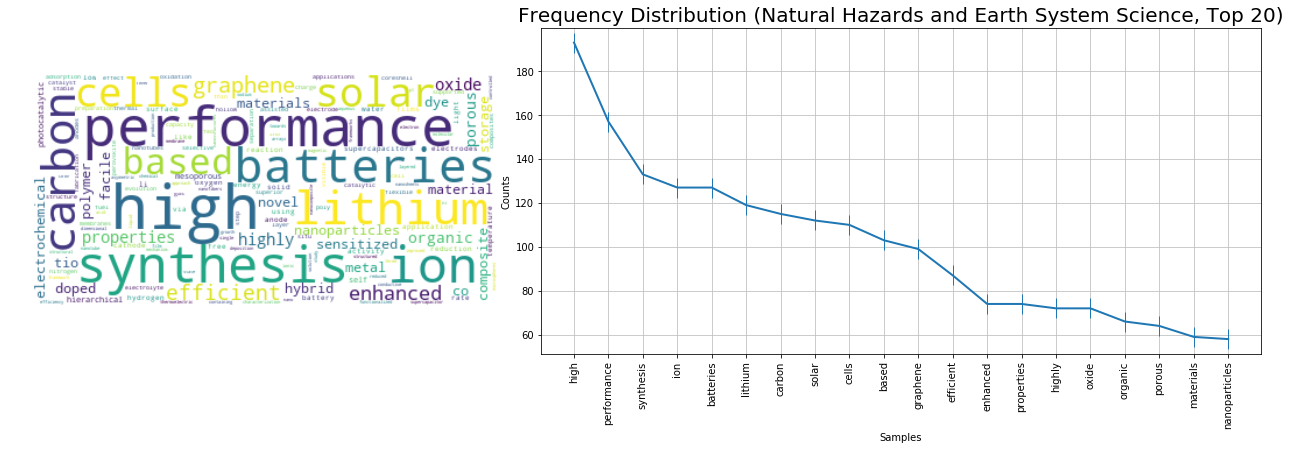

<Figure size 432x288 with 0 Axes>

In [40]:
get_freqdist_wc(Journal_of_Materials_Chemistry_A_p, 'Natural Hazards and Earth System Science')

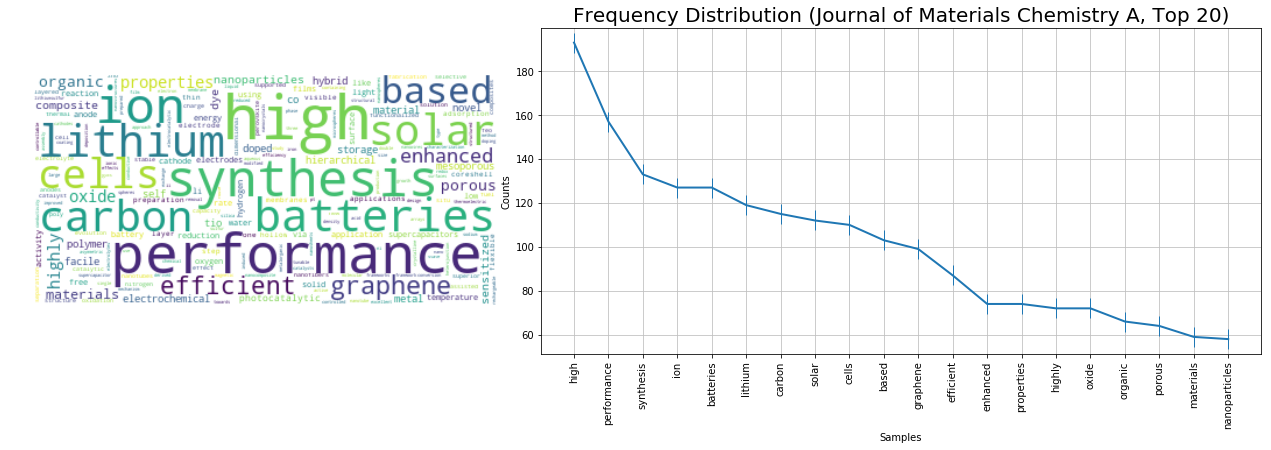

<Figure size 432x288 with 0 Axes>

In [36]:
get_freqdist_wc(Journal_of_Materials_Chemistry_A_p, 'Journal of Materials Chemistry A')

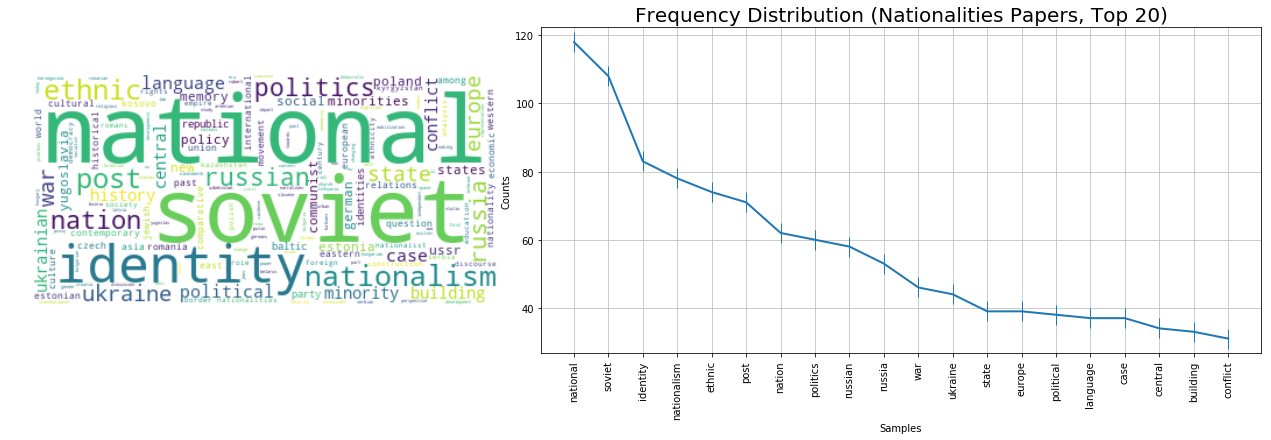

<Figure size 432x288 with 0 Axes>

In [37]:
get_freqdist_wc(Nationalities_Papers_p, 'Nationalities Papers')

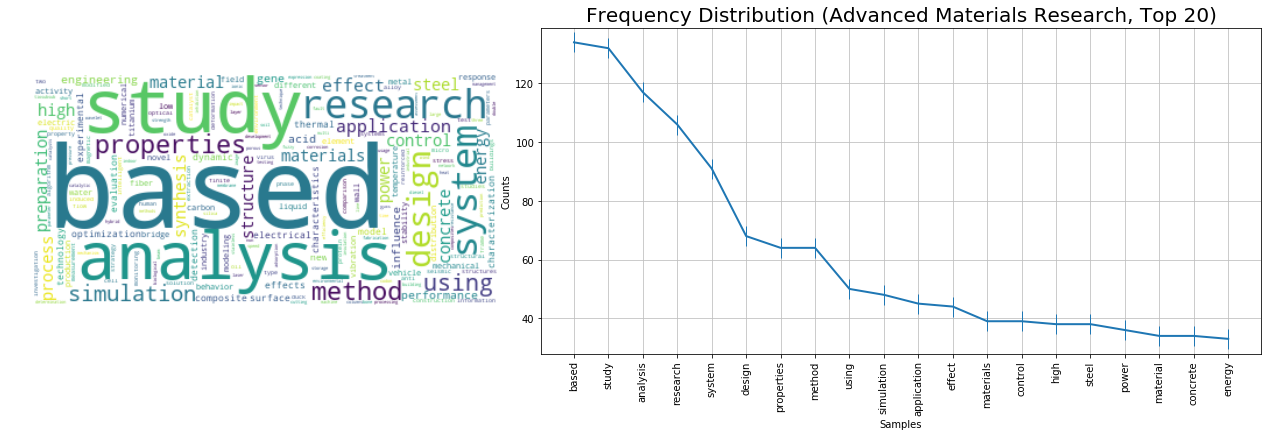

<Figure size 432x288 with 0 Axes>

In [29]:
get_freqdist_wc(Advanced_Materials_Research_p, 'Advanced Materials Research')

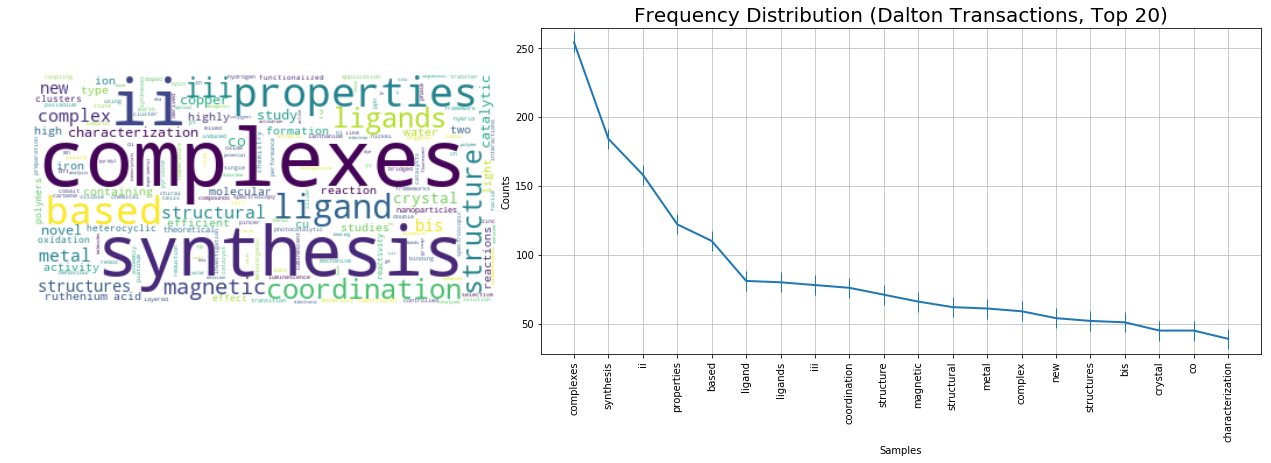

<Figure size 432x288 with 0 Axes>

In [26]:
get_freqdist_wc(Dalton_Transactions_p, 'Dalton Transactions')

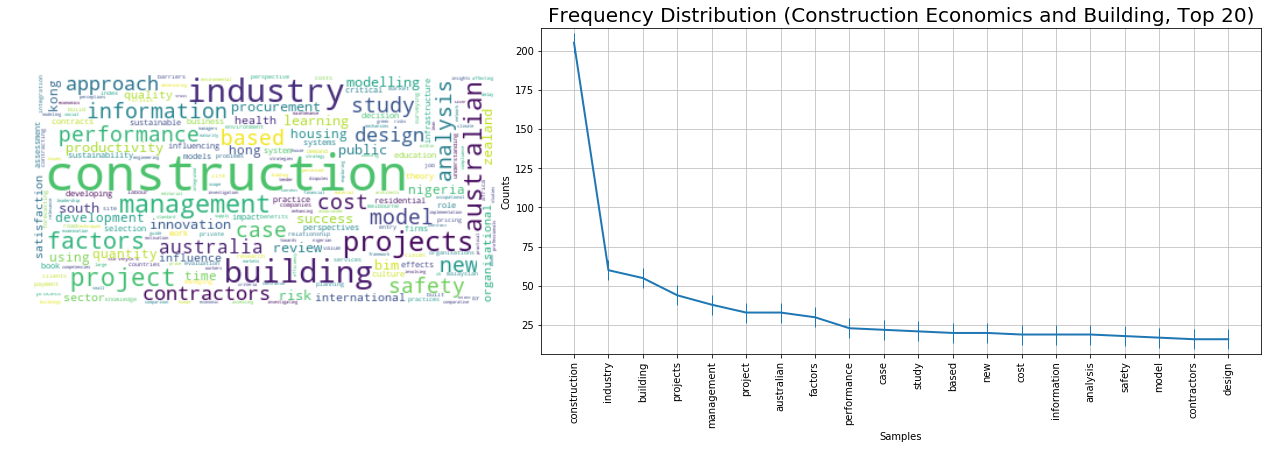

<Figure size 432x288 with 0 Axes>

In [21]:
get_freqdist_wc(Construction_Economics_and_Building_p, 'Construction Economics and Building')

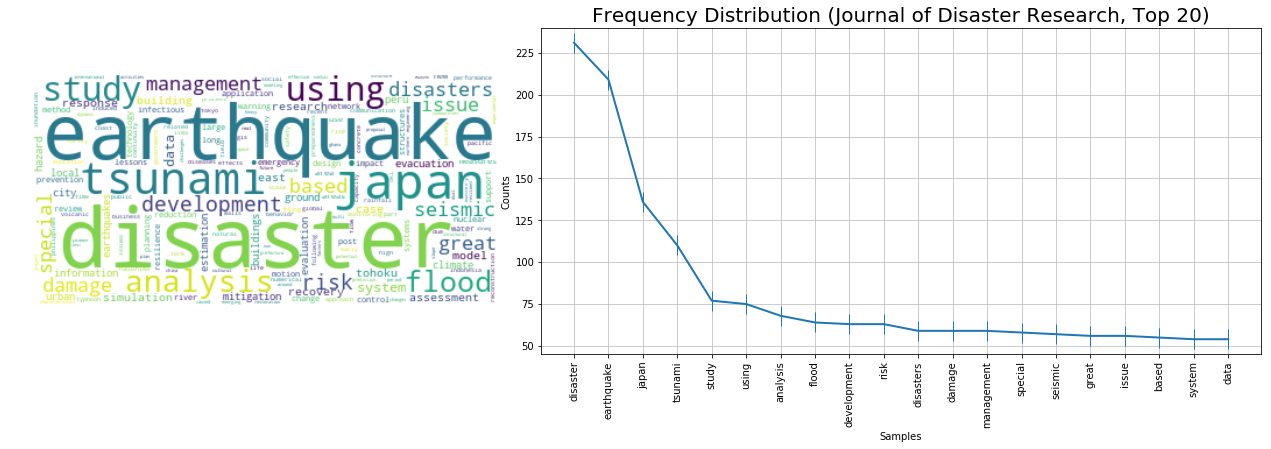

<Figure size 432x288 with 0 Axes>

In [23]:
get_freqdist_wc(Journal_of_Disaster_Research_p , 'Journal of Disaster Research')

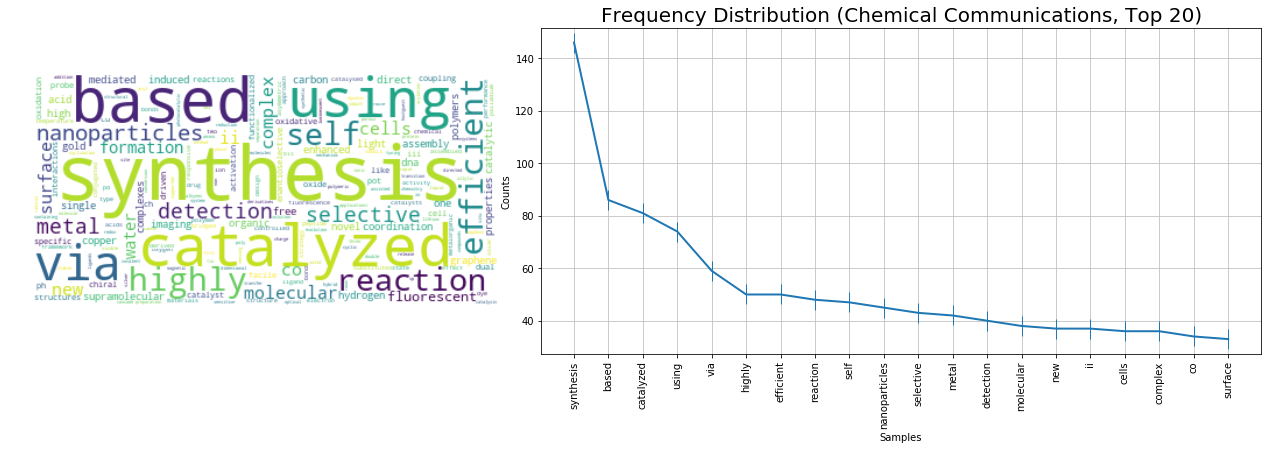

<Figure size 432x288 with 0 Axes>

In [22]:
get_freqdist_wc(Chemical_Communications_p , 'Chemical Communications')

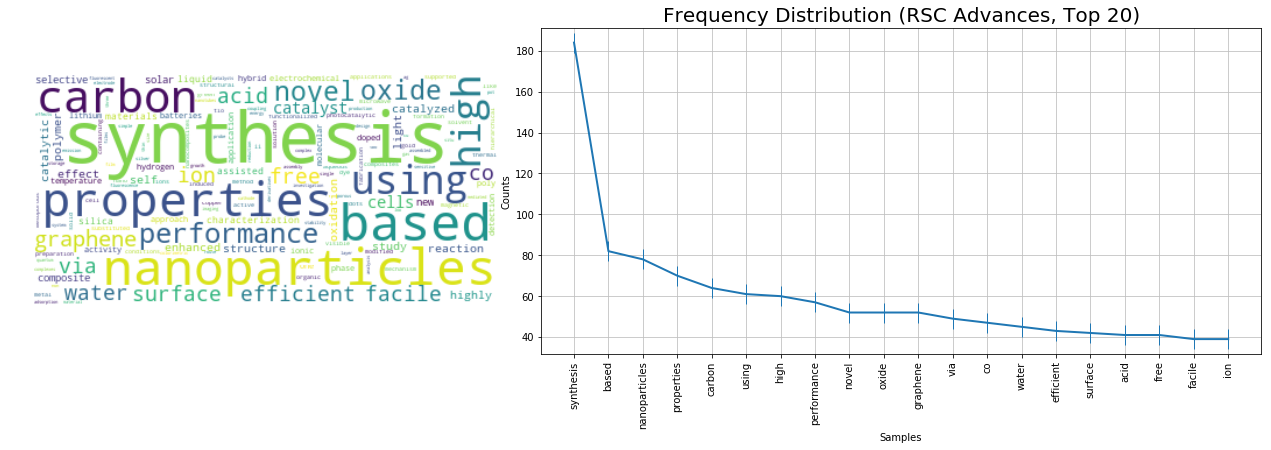

<Figure size 432x288 with 0 Axes>

In [33]:
get_freqdist_wc(RSC_Advances_p , 'RSC Advances')

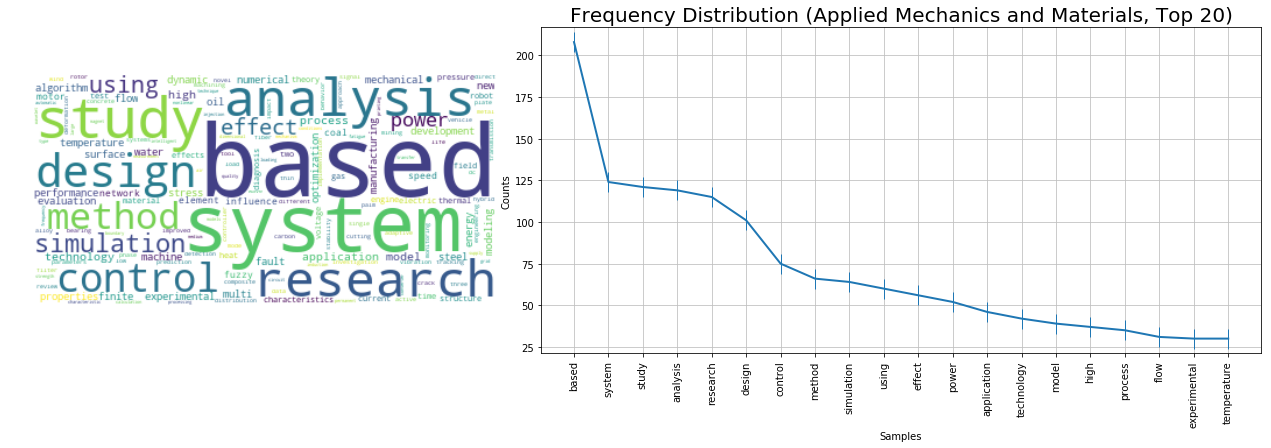

<Figure size 432x288 with 0 Axes>

In [34]:
get_freqdist_wc(Applied_Mechanics_and_Materials_p, 'Applied Mechanics and Materials')

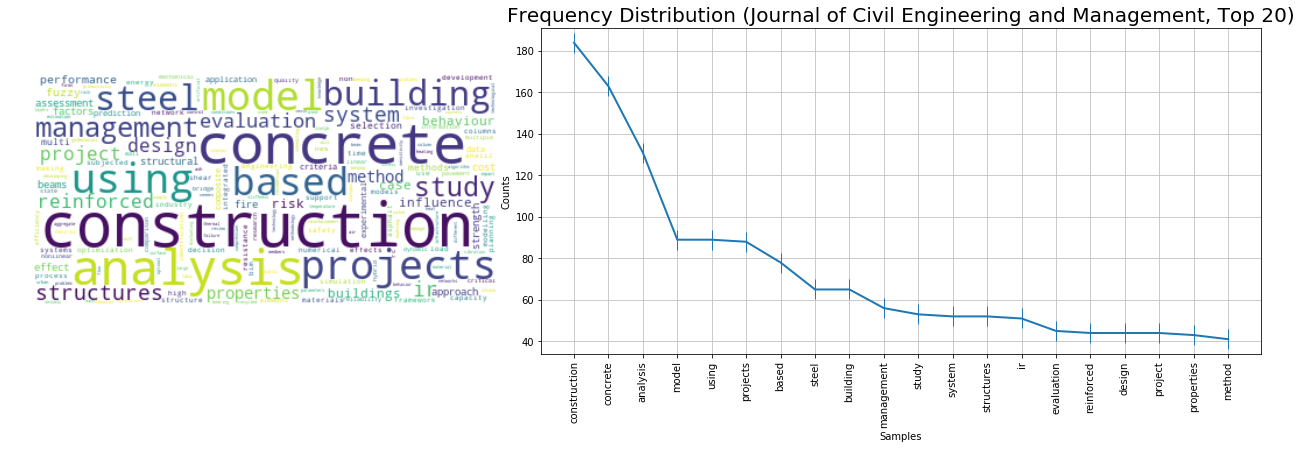

<Figure size 432x288 with 0 Axes>

In [18]:
get_freqdist_wc(Journal_of_Civil_Engineering_and_Management_p, 'Journal of Civil Engineering and Management')